<a href="https://colab.research.google.com/github/juli-ter/Project_SAS/blob/master/2_Statistics_and_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Statistics and visualisation

We have already cleaned the initial data set and now it is time to have a look on the values and try to make conclutions

In [0]:
import pandas as pd               
import numpy as np           
import matplotlib as mpl
import matplotlib.pyplot as plt   
import seaborn as sns             
plt.style.use('ggplot')     

%matplotlib inline

In [0]:
df = pd.read_csv('clean_data.csv')

In [0]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,...,СуммаУслуг,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина
0,01.03.2017 11:41,07.03.2017 0:00,3998972_TR,Частичный возврат,12098,12 247,Курьерская,Наличная,Москва,КРУПНОГАБАРИТНЫЙ ТОВАР,...,0,0,8,1,28.02.2017 0:00,55574854-48574951555577,106117_ju18@yandex.ru,Юлия,ID9010020114553,0
1,01.03.2017 12:22,15.03.2017 0:00,3999117_TR,Доставлен,4819,3 759,Магазины,Безналичная,Челябинск,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,0,0,3,1,01.03.2017 0:00,55575453-56535648535679,107117_ku16@list.ru,Гость,IDL00028974351,0
2,01.03.2017 12:31,17.03.2017 0:00,3999122_TR,Доставлен,3325,3 325,Магазины,Безналичная,Нижневартовск,ИГРУШКИ,...,0,0,1,1,01.03.2017 0:00,55574950-57515657535772,109117_mu17@mail.ru,Гость,IDL00038573351,0
3,01.03.2017 3:06,02.03.2017 0:00,3999363_TR,К отгрузке,4998,4 998,Курьерская,Наличная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,0,0,4,0,01.03.2017 0:00,55574851-55545249535475,115117_su13@mail.ru,Гость,IDL00034303856,0
4,01.03.2017 11:38,14.03.2017 0:00,3999411_TR,Доставлен,528,528,Магазины,Безналичная,Ижевск,ИГРУШКИ,...,0,0,3,1,01.03.2017 0:00,55574854-56495552515179,guest_103117_gu28@workmail.ru,Гость,IDL00035791553,0


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616849 entries, 0 to 616848
Data columns (total 35 columns):
Дата                        616849 non-null object
ДатаДоставки                616230 non-null object
НомерЗаказаНаСайте          616849 non-null object
НовыйСтатус                 616849 non-null object
СуммаЗаказаНаСайте          616849 non-null int64
СуммаДокумента              616849 non-null object
МетодДоставки               616849 non-null object
ФормаОплаты                 616849 non-null object
Регион                      611798 non-null object
Группа2                     616849 non-null object
Группа3                     616849 non-null object
Группа4                     585910 non-null object
Тип                         616849 non-null object
Номенклатура                616849 non-null object
ТипТовара                   616849 non-null object
Отменено                    616849 non-null object
Количество                  616849 non-null int64
Цена                    

Firstly, we will calculate avarage value of a bill and avarage value of the marge of a bill. In order to do that we need to group rows of the dataframe by the number of the bill. 

In [0]:
df_by_bills = df[['НомерЗаказаНаСайте', 'СуммаСтроки', 'Маржа']].groupby('НомерЗаказаНаСайте').aggregate(sum)
df_by_bills = df_by_bills.fillna(0)

print('Number of unique bills:', )

In [0]:

av_bill = df_by_bills['СуммаСтроки'].mean()
av_marge = df_by_bills['Маржа'].mean()

print('Avarage bill:', av_bill)
print('Avarage marge:', av_marge)



Avarage bill: 3385.969676602131
Avarage marge: 803.4567708414861


This values do not contradicts logic. However, mean value is representative if the distribution of the variable is close to normal. Outsiders can influense the mean value. Lets then look at the distribution of bills and marge in bills

In [0]:
med_bill = df_by_bills['СуммаСтроки'].median()
med_marge = df_by_bills['Маржа'].median()

print('Avarage bill:', med_bill)
print('Avarage marge:', med_marge)

Avarage bill: 2140.0
Avarage marge: 336.0


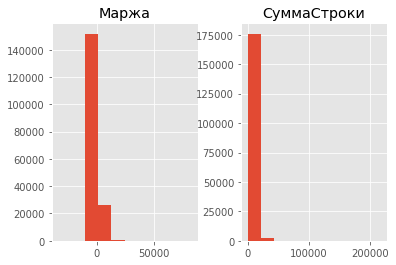

In [0]:
df_by_bills[['СуммаСтроки','Маржа']].hist();

In [0]:
df_by_bills[['СуммаСтроки','Маржа']] = df_by_bills[['СуммаСтроки','Маржа']].apply(lambda w: np.log(w + 1))

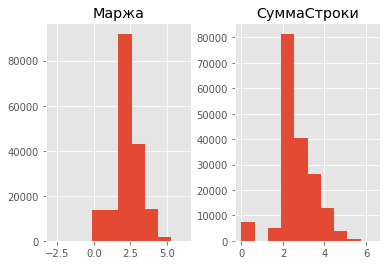

In [0]:
df_by_bills[['СуммаСтроки','Маржа']].hist();

Now lets look how different catigoris of goods are distributed in our data set. What category of products are most often bought? Which category of products brings the most profit, that is, which category is the most marginal? For clarity, let's look at pie chars

In [0]:
def pieChar(data_names, data_values, title):
    #data_names - массив названий частей диаграммы
    #data_values - массив соответствующих числовых значений
    #title - заголовок диаграммы 
    dpi = 80
    fig = plt.figure(dpi = dpi, figsize = (512 / dpi, 384 / dpi) )
    mpl.rcParams.update({'font.size': 9})

    plt.title(title)

    xs = range(len(data_names))

    plt.pie(
        data_values, autopct='%.1f', radius = 1.1,
        explode = [0.15] + [0 for _ in range(len(data_names) - 1)] )
    plt.legend(
        bbox_to_anchor = (-0.16, 0.45, 0.25, 0.25),
        loc = 'lower left', labels = data_names )
    fig.savefig('pie.png')

In [0]:
type_set = df["Тип"].unique()

In [0]:
quantity_for_types = []
marge_for_types = []
for types in type_set:
    quantity_for_types.append(len(df[df["Тип"] == types]))
    marge_for_types.append(df[df["Тип"] == types]['Маржа'].sum())

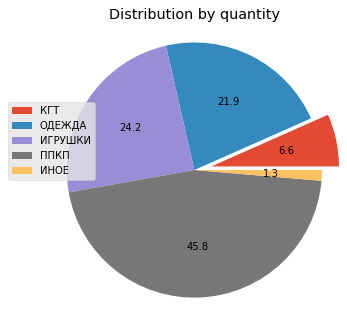

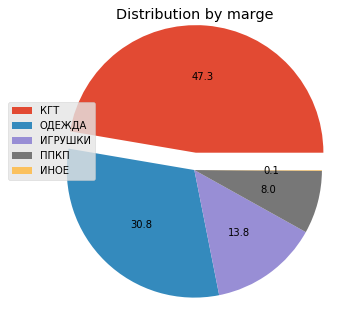

In [0]:
pieChar(type_set, quantity_for_types, 'Distribution by quantity')
pieChar(type_set, marge_for_types, 'Distribution by marge')


ДОПИСАТЬ ВЫВОДЫ КОТОРЫЕ МОЖНО СДЕЛАТЬ НА ОСНОВЕ ПАЙ ЧАРОВ